Problem Statement:❓
Using different techniques of Machine Learning, we need to build a Recommender System that recommends movies based on “ Cast, Genre, Reviews, TMDB/IMDB ratings”

Using different types of recommendation techniques like:
1. Popularity based recommender system
2. Content based Recommender System
3. Collaborative Recommender System


# Importing dependencies 

In [1]:
import pandas as pd 
import numpy as np
import warnings

# Ignore a specific warning by category
warnings.filterwarnings("ignore")

In [2]:
credits=pd.read_csv(r"C:\Users\HP\Desktop\Internship final project\credits.csv")
movies=pd.read_csv(r"C:\Users\HP\Desktop\Internship final project\movies_metadata.csv")
keywords=pd.read_csv(r"C:\Users\HP\Desktop\Internship final project\keywords.csv")
links=pd.read_csv(r"C:\Users\HP\Desktop\Internship final project\links.csv")

In [3]:
print('Shape of Credits:',credits.shape)
print('Shape of Movies:',movies.shape)


Shape of Credits: (45476, 3)
Shape of Movies: (45466, 24)


In [4]:
credits.head()


,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [5]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [6]:
credits.describe()

,id
count,45476.000000
mean,108345.997537
std,112443.796536
min,2.000000
25%,26443.250000
50%,60002.500000
75%,157302.000000
max,469172.000000


In [7]:
movies.head().T

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [8]:
movies.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [10]:
#changing datatype of id column
movies = movies[movies['id'].str.isnumeric()]  # Keep only rows with numeric 'id' values
movies['id'] = movies['id'].astype(int)  # Convert 'id' column to integer

In [11]:
keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [12]:
keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [13]:
print(movies.columns)
print(keywords.columns)
print(credits.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')
Index(['id', 'keywords'], dtype='object')
Index(['cast', 'crew', 'id'], dtype='object')


In [14]:
# Merge the two dataframes based on the 'id' column
df = pd.merge(credits, movies,  on='id')
df.head()


,cast,crew,id,adult,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,tt0114709,en,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,tt0113497,en,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,tt0113228,en,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0114885,en,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0113041,en,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [15]:
new_df = pd.merge(df, keywords, on='id')

In [16]:
new_df.columns

Index(['cast', 'crew', 'id', 'adult', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'keywords'],
      dtype='object')

In [17]:
new_df.shape

(46628, 27)

In [18]:
#creating new feature year
# Convert the 'release_date' to datetime if it's not already in datetime format
new_df['release_date'] = pd.to_datetime(new_df['release_date'])

# Extract the year from the date
new_df['release_year'] = new_df['release_date'].dt.year

In [19]:
#create a new feature weighted rating
# Calculate the mean and total vote count for all movies
mean_vote = new_df['vote_average'].mean()
total_votes = new_df['vote_count'].sum()

# Define the minimum vote count threshold for considering a movie
min_vote_count = 1000

# Compute the weighted rating for each movie
new_df['weighted_rating'] = (new_df['vote_count'] / (new_df['vote_count'] + min_vote_count)) * new_df['vote_average'] + (min_vote_count / (new_df['vote_count'] + min_vote_count)) * mean_vote

In [20]:
# Create new column rating based on the weighted rating
new_df['rating'] = np.where(new_df['weighted_rating'] >= 8, 'High', np.where(new_df['weighted_rating'] >= 6, 'Average', 'Low'))

In [21]:
new_df.columns

Index(['cast', 'crew', 'id', 'adult', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'keywords', 'release_year',
       'weighted_rating', 'rating'],
      dtype='object')

# Feature selection

In [22]:
#selected features
movie=new_df[['id','genres','title','keywords','cast','overview','crew','adult','budget','original_language','popularity','revenue','runtime','status','video','weighted_rating','rating','release_year']]

In [23]:
movie.isnull().sum()

id                     0
genres                 0
title                  4
keywords               0
cast                   0
overview             995
crew                   0
adult                  0
budget                 0
original_language     11
popularity             4
revenue                4
runtime              268
status                86
video                  4
weighted_rating        4
rating                 0
release_year          88
dtype: int64

In [24]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46628 entries, 0 to 46627
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 46628 non-null  int64  
 1   genres             46628 non-null  object 
 2   title              46624 non-null  object 
 3   keywords           46628 non-null  object 
 4   cast               46628 non-null  object 
 5   overview           45633 non-null  object 
 6   crew               46628 non-null  object 
 7   adult              46628 non-null  object 
 8   budget             46628 non-null  object 
 9   original_language  46617 non-null  object 
 10  popularity         46624 non-null  object 
 11  revenue            46624 non-null  float64
 12  runtime            46360 non-null  float64
 13  status             46542 non-null  object 
 14  video              46624 non-null  object 
 15  weighted_rating    46624 non-null  float64
 16  rating             466

In [25]:
movie['overview'].mode()[0]

'No overview found.'

In [26]:
#deal with null value in over view column 
most_common_overview = movie['overview'].mode()[0]
movie['overview'].fillna(most_common_overview, inplace=True)


In [27]:
# Replace NaN values in 'original_language' column with 'Unknown'
movie['original_language'].fillna('Unknown', inplace=True)

In [28]:
mean_runtime = movies['runtime'].mean()
# Fill NaN values in 'runtime' column with mean value
movie['runtime'].fillna(mean_runtime, inplace=True)

In [29]:
movie['status'].unique()

array(['Released', nan, 'Rumored', 'Post Production', 'In Production',
       'Planned', 'Canceled'], dtype=object)

In [30]:
# Replace NaN values in 'original_language' column with 'Unknown'
movie['status'].fillna('Unknown', inplace=True)

In [31]:
movie.dropna(subset=['title','release_year'], inplace=True)

In [32]:
movie.dropna(subset=['release_year'], inplace=True)

In [33]:
movie.shape

(46540, 18)

In [34]:
movie.isnull().sum()

id                   0
genres               0
title                0
keywords             0
cast                 0
overview             0
crew                 0
adult                0
budget               0
original_language    0
popularity           0
revenue              0
runtime              0
status               0
video                0
weighted_rating      0
rating               0
release_year         0
dtype: int64

In [35]:
movie['popularity'].unique()

array([21.946943, 17.015539, 11.7129, ..., '0.903007', '0.003503',
       '0.163015'], dtype=object)

In [36]:
movie['popularity'] = pd.to_numeric(movie['popularity'], errors='coerce')

In [37]:
movie['popularity'] = movie['popularity'].round(2)

### Data Cleaning

In [38]:
import ast
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [39]:
movie['genres'] = movie['genres'].apply(convert)
movie.head()

,id,genres,title,keywords,cast,overview,crew,adult,budget,original_language,popularity,revenue,runtime,status,video,weighted_rating,rating,release_year
0,862,"[Animation, Comedy, Family]",Toy Story,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","Led by Woody, Andy's toys live happily in his ...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",False,30000000,en,21.95,373554033.0,81.0,Released,False,7.374470,Average,1995.0
1,8844,"[Adventure, Fantasy, Family]",Jumanji,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...",When siblings Judy and Peter discover an encha...,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",False,65000000,en,17.02,262797249.0,104.0,Released,False,6.522540,Average,1995.0
2,15602,"[Romance, Comedy]",Grumpier Old Men,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...",A family wedding reignites the ancient feud be...,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",False,0,en,11.71,0.0,101.0,Released,False,5.686564,Low,1995.0
3,31357,"[Comedy, Drama, Romance]",Waiting to Exhale,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","Cheated on, mistreated and stepped on, the wom...","[{'credit_id': '52fe44779251416c91011acb', 'de...",False,16000000,en,3.86,81452156.0,127.0,Released,False,5.627783,Low,1995.0
4,11862,[Comedy],Father of the Bride Part II,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...",Just when George Banks has recovered from his ...,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",False,0,en,8.39,76578911.0,106.0,Released,False,5.624747,Low,1995.0


In [40]:
movie['keywords'] = movie['keywords'].apply(convert)
movie.head()

,id,genres,title,keywords,cast,overview,crew,adult,budget,original_language,popularity,revenue,runtime,status,video,weighted_rating,rating,release_year
0,862,"[Animation, Comedy, Family]",Toy Story,"[jealousy, toy, boy, friendship, friends, riva...","[{'cast_id': 14, 'character': 'Woody (voice)',...","Led by Woody, Andy's toys live happily in his ...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",False,30000000,en,21.95,373554033.0,81.0,Released,False,7.374470,Average,1995.0
1,8844,"[Adventure, Fantasy, Family]",Jumanji,"[board game, disappearance, based on children'...","[{'cast_id': 1, 'character': 'Alan Parrish', '...",When siblings Judy and Peter discover an encha...,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",False,65000000,en,17.02,262797249.0,104.0,Released,False,6.522540,Average,1995.0
2,15602,"[Romance, Comedy]",Grumpier Old Men,"[fishing, best friend, duringcreditsstinger, o...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...",A family wedding reignites the ancient feud be...,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",False,0,en,11.71,0.0,101.0,Released,False,5.686564,Low,1995.0
3,31357,"[Comedy, Drama, Romance]",Waiting to Exhale,"[based on novel, interracial relationship, sin...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","Cheated on, mistreated and stepped on, the wom...","[{'credit_id': '52fe44779251416c91011acb', 'de...",False,16000000,en,3.86,81452156.0,127.0,Released,False,5.627783,Low,1995.0
4,11862,[Comedy],Father of the Bride Part II,"[baby, midlife crisis, confidence, aging, daug...","[{'cast_id': 1, 'character': 'George Banks', '...",Just when George Banks has recovered from his ...,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",False,0,en,8.39,76578911.0,106.0,Released,False,5.624747,Low,1995.0


In [41]:
#extracts only names from the column 
def convert3(text):
    L = []
    counter = 0
    for i in ast.literal_eval(text):
        if counter < 3:
            L.append(i['name'])
        counter+=1
    return L 

In [42]:
movie['cast'] = movie['cast'].apply(convert)
movie.head()

,id,genres,title,keywords,cast,overview,crew,adult,budget,original_language,popularity,revenue,runtime,status,video,weighted_rating,rating,release_year
0,862,"[Animation, Comedy, Family]",Toy Story,"[jealousy, toy, boy, friendship, friends, riva...","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...","Led by Woody, Andy's toys live happily in his ...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",False,30000000,en,21.95,373554033.0,81.0,Released,False,7.374470,Average,1995.0
1,8844,"[Adventure, Fantasy, Family]",Jumanji,"[board game, disappearance, based on children'...","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",When siblings Judy and Peter discover an encha...,"[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",False,65000000,en,17.02,262797249.0,104.0,Released,False,6.522540,Average,1995.0
2,15602,"[Romance, Comedy]",Grumpier Old Men,"[fishing, best friend, duringcreditsstinger, o...","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",A family wedding reignites the ancient feud be...,"[{'credit_id': '52fe466a9251416c75077a89', 'de...",False,0,en,11.71,0.0,101.0,Released,False,5.686564,Low,1995.0
3,31357,"[Comedy, Drama, Romance]",Waiting to Exhale,"[based on novel, interracial relationship, sin...","[Whitney Houston, Angela Bassett, Loretta Devi...","Cheated on, mistreated and stepped on, the wom...","[{'credit_id': '52fe44779251416c91011acb', 'de...",False,16000000,en,3.86,81452156.0,127.0,Released,False,5.627783,Low,1995.0
4,11862,[Comedy],Father of the Bride Part II,"[baby, midlife crisis, confidence, aging, daug...","[Steve Martin, Diane Keaton, Martin Short, Kim...",Just when George Banks has recovered from his ...,"[{'credit_id': '52fe44959251416c75039ed7', 'de...",False,0,en,8.39,76578911.0,106.0,Released,False,5.624747,Low,1995.0


In [43]:
movie['cast'][0]

['Tom Hanks',
 'Tim Allen',
 'Don Rickles',
 'Jim Varney',
 'Wallace Shawn',
 'John Ratzenberger',
 'Annie Potts',
 'John Morris',
 'Erik von Detten',
 'Laurie Metcalf',
 'R. Lee Ermey',
 'Sarah Freeman',
 'Penn Jillette']

In [44]:
#taking only top three names from the cast 
movie['cast']=movie['cast'].apply(lambda x:x[0:3])

In [45]:
#extracts the name of director 
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [46]:
movie['crew'] = movie['crew'].apply(fetch_director)

In [47]:
#removes space between words
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [48]:
movie['cast'] = movie['cast'].apply(collapse)
movie['crew'] = movie['crew'].apply(collapse)
movie['genres'] = movie['genres'].apply(collapse)
movie['keywords'] = movie['keywords'].apply(collapse)

In [49]:
movie.head()

,id,genres,title,keywords,cast,overview,crew,adult,budget,original_language,popularity,revenue,runtime,status,video,weighted_rating,rating,release_year
0,862,"[Animation, Comedy, Family]",Toy Story,"[jealousy, toy, boy, friendship, friends, riva...","[TomHanks, TimAllen, DonRickles]","Led by Woody, Andy's toys live happily in his ...",[JohnLasseter],False,30000000,en,21.95,373554033.0,81.0,Released,False,7.374470,Average,1995.0
1,8844,"[Adventure, Fantasy, Family]",Jumanji,"[boardgame, disappearance, basedonchildren'sbo...","[RobinWilliams, JonathanHyde, KirstenDunst]",When siblings Judy and Peter discover an encha...,[JoeJohnston],False,65000000,en,17.02,262797249.0,104.0,Released,False,6.522540,Average,1995.0
2,15602,"[Romance, Comedy]",Grumpier Old Men,"[fishing, bestfriend, duringcreditsstinger, ol...","[WalterMatthau, JackLemmon, Ann-Margret]",A family wedding reignites the ancient feud be...,[HowardDeutch],False,0,en,11.71,0.0,101.0,Released,False,5.686564,Low,1995.0
3,31357,"[Comedy, Drama, Romance]",Waiting to Exhale,"[basedonnovel, interracialrelationship, single...","[WhitneyHouston, AngelaBassett, LorettaDevine]","Cheated on, mistreated and stepped on, the wom...",[ForestWhitaker],False,16000000,en,3.86,81452156.0,127.0,Released,False,5.627783,Low,1995.0
4,11862,[Comedy],Father of the Bride Part II,"[baby, midlifecrisis, confidence, aging, daugh...","[SteveMartin, DianeKeaton, MartinShort]",Just when George Banks has recovered from his ...,[CharlesShyer],False,0,en,8.39,76578911.0,106.0,Released,False,5.624747,Low,1995.0


In [50]:
movie['overview'].apply(lambda x:x.split())

0        [Led, by, Woody,, Andy's, toys, live, happily,...
1        [When, siblings, Judy, and, Peter, discover, a...
2        [A, family, wedding, reignites, the, ancient, ...
3        [Cheated, on,, mistreated, and, stepped, on,, ...
4        [Just, when, George, Banks, has, recovered, fr...
                               ...                        
46622    [Yet, another, version, of, the, classic, epic...
46624    [An, artist, struggles, to, finish, his, work,...
46625    [When, one, of, her, hits, goes, wrong,, a, pr...
46626    [In, a, small, town, live, two, brothers,, one...
46627    [50, years, after, decriminalisation, of, homo...
Name: overview, Length: 46540, dtype: object

In [51]:
#split the sentence
movie['overview'] = movie['overview'].apply(lambda x:x.split())

In [52]:
movie['tags'] = movie['overview'] + movie['genres'] + movie['keywords'] + movie['cast'] + movie['crew']

In [53]:
movies_df = movie.drop(columns=['overview','genres','keywords','cast','crew'])

In [54]:
movies_df.head(2)

,id,title,adult,budget,original_language,popularity,revenue,runtime,status,video,weighted_rating,rating,release_year,tags
0,862,Toy Story,False,30000000,en,21.95,373554033.0,81.0,Released,False,7.37447,Average,1995.0,"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,Jumanji,False,65000000,en,17.02,262797249.0,104.0,Released,False,6.52254,Average,1995.0,"[When, siblings, Judy, and, Peter, discover, a..."


In [55]:
movie['crew']=movie['crew'].apply( lambda x: " ".join(x))
movie['cast']=movie['cast'].apply( lambda x: " ".join(x))
movie['genres']=movie['genres'].apply( lambda x: " ".join(x))
movie['keywords']=movie['keywords'].apply( lambda x: " ".join(x))
movie['overview']=movie['overview'].apply( lambda x: " ".join(x))

In [56]:
movie.head()

,id,genres,title,keywords,cast,overview,crew,adult,budget,original_language,popularity,revenue,runtime,status,video,weighted_rating,rating,release_year,tags
0,862,Animation Comedy Family,Toy Story,jealousy toy boy friendship friends rivalry bo...,TomHanks TimAllen DonRickles,"Led by Woody, Andy's toys live happily in his ...",JohnLasseter,False,30000000,en,21.95,373554033.0,81.0,Released,False,7.374470,Average,1995.0,"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,Adventure Fantasy Family,Jumanji,boardgame disappearance basedonchildren'sbook ...,RobinWilliams JonathanHyde KirstenDunst,When siblings Judy and Peter discover an encha...,JoeJohnston,False,65000000,en,17.02,262797249.0,104.0,Released,False,6.522540,Average,1995.0,"[When, siblings, Judy, and, Peter, discover, a..."
2,15602,Romance Comedy,Grumpier Old Men,fishing bestfriend duringcreditsstinger oldmen,WalterMatthau JackLemmon Ann-Margret,A family wedding reignites the ancient feud be...,HowardDeutch,False,0,en,11.71,0.0,101.0,Released,False,5.686564,Low,1995.0,"[A, family, wedding, reignites, the, ancient, ..."
3,31357,Comedy Drama Romance,Waiting to Exhale,basedonnovel interracialrelationship singlemot...,WhitneyHouston AngelaBassett LorettaDevine,"Cheated on, mistreated and stepped on, the wom...",ForestWhitaker,False,16000000,en,3.86,81452156.0,127.0,Released,False,5.627783,Low,1995.0,"[Cheated, on,, mistreated, and, stepped, on,, ..."
4,11862,Comedy,Father of the Bride Part II,baby midlifecrisis confidence aging daughter m...,SteveMartin DianeKeaton MartinShort,Just when George Banks has recovered from his ...,CharlesShyer,False,0,en,8.39,76578911.0,106.0,Released,False,5.624747,Low,1995.0,"[Just, when, George, Banks, has, recovered, fr..."


# EDA

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

## *UNIVARIATE DATA ANALYSIS*

### *TOP 5 MOVIE CREW MEMBERS WHO ACTED IN MORE MOVIES*

In [58]:
movie['crew'].value_counts()

                                                      865
JohnFord                                               64
MichaelCurtiz                                          62
JulienDuvivier                                         54
WernerHerzog                                           53
                                                     ... 
JoungYumi                                               1
MelvilleW.Brown                                         1
RobCowan                                                1
YoshiharuAshino VladimirZhelezniakov AljoshaKlimov      1
DaisyAsquith                                            1
Name: crew, Length: 18823, dtype: int64

In [59]:
movie['crew'].value_counts().head()

                  865
JohnFord           64
MichaelCurtiz      62
JulienDuvivier     54
WernerHerzog       53
Name: crew, dtype: int64

- John Ford leads the way by acting in 64 movies

### *MOVIES BASED ON RELEASE YEAR*

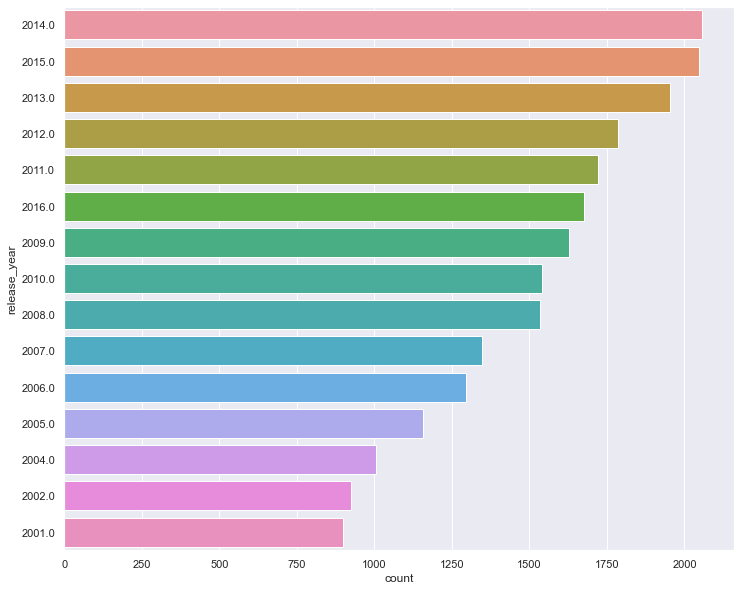

In [60]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=movie, order=movie['release_year'].value_counts().index[0:15])

- Based on the graph *2014* is the year when most of the movies were released
- Also *2001* is the year when lease number of movies were released.

### *MOVIES BASED ON GENRES*

Text(0.5, 1.0, 'Distribution of Genres')

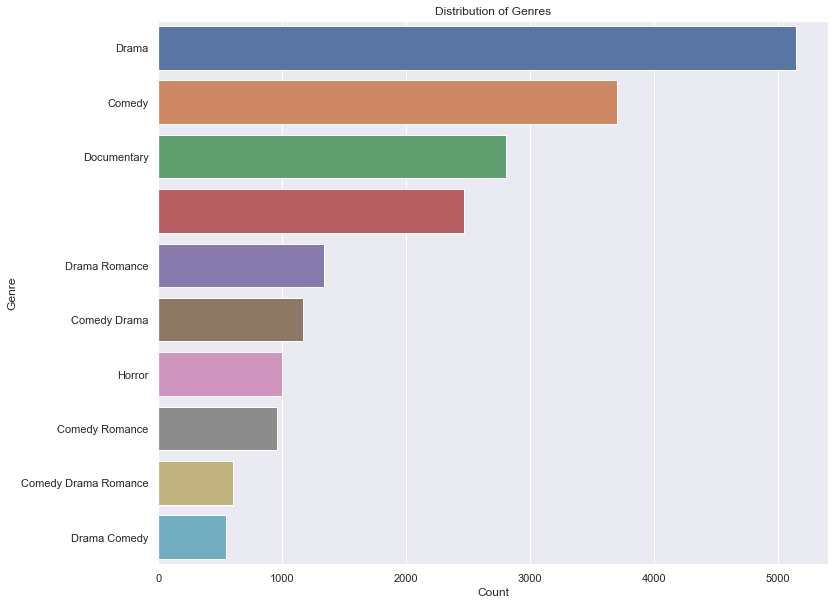

In [61]:
plt.figure(figsize=(12,10))
count = movie['genres'].value_counts()[:10]
sns.barplot(count.values, count.index)
plt.xlabel('Count')
plt.ylabel('Genre')
plt.title("Distribution of Genres")

- Based on the graph above, we can conclude Most movies were released based on the *DRAMA* GENRE

- The lease popular option was *DRAMA COMEDY* GENRE

### *TOP 5 MOVIES WITH HIGHEST POPULARITY*

In [62]:
i = movie.nlargest(5, 'popularity')[['title','popularity']]
i

,title,popularity
30910,Minions,547.49
33573,Wonder Woman,294.34
43388,Beauty and the Beast,287.25
44809,Baby Driver,228.03
24657,Big Hero 6,213.85


- Unexpectedly one of the favourite characters "MINIONS" tops the list in terms of popularity based.

### *TOP 5 HIGH REVENUE GENERATED MOVIES*

In [63]:
x = movie.nlargest(5, 'revenue')[['title','revenue']]
x

,title,revenue
14723,Avatar,2.787965e+09
26770,Star Wars: The Force Awakens,2.068224e+09
1659,Titanic,1.845034e+09
18008,The Avengers,1.519558e+09
25285,Jurassic World,1.513529e+09


- As expected *AVATAR* movie directed by JAMES CAMEROON tops the list for the high revenue generated movies

# Bivariate Data Analysis

In [64]:
movie.corr()

,id,popularity,revenue,runtime,weighted_rating,release_year
id,1.000000,-0.081730,-0.070249,-0.115874,-0.089903,0.288862
popularity,-0.081730,1.000000,0.505896,0.128904,0.478939,0.131275
revenue,-0.070249,0.505896,1.000000,0.102728,0.559033,0.087256
runtime,-0.115874,0.128904,0.102728,1.000000,0.140539,0.080253
weighted_rating,-0.089903,0.478939,0.559033,0.140539,1.000000,0.057730
release_year,0.288862,0.131275,0.087256,0.080253,0.057730,1.000000


In [65]:
movie.groupby(by='title')['weighted_rating'].mean().sort_values(ascending=False)

title
The Shawshank Redemption    8.191358
The Godfather               8.088800
Fight Club                  8.048242
Pulp Fiction                8.021999
Inception                   7.934940
                              ...   
Epic Movie                  5.007892
Jack and Jill               4.995508
Catwoman                    4.970173
Batman & Robin              4.776922
Dragonball Evolution        4.738460
Name: weighted_rating, Length: 42195, dtype: float64

observation: According to the weighted ratings, the top three films are "The Shawshank Redemption," "The Godfather," and "Fight Club."

In [66]:
movie.groupby(by='title')['rating'].count().sort_values(ascending=False)

title
Blackout                            31
Cinderella                          13
The Promise                         12
King Lear                           12
Why We Fight: Divide and Conquer    12
                                    ..
Horror of the Blood Monsters         1
Horrorvision                         1
Horse Feathers                       1
Horse Sense                          1
ファンタスティポ                             1
Name: rating, Length: 42195, dtype: int64

observation: When compared to other films, the Blackout movie has the most ratings.

In [67]:
movie.groupby(by='title')['revenue'].mean().sort_values(ascending=False)

title
Avatar                          2.787965e+09
Star Wars: The Force Awakens    2.068224e+09
Jurassic World                  1.513529e+09
Furious 7                       1.506249e+09
Avengers: Age of Ultron         1.405404e+09
                                    ...     
Illicit                         0.000000e+00
Illtown                         0.000000e+00
Illuminata                      0.000000e+00
Illumination                    0.000000e+00
ファンタスティポ                        0.000000e+00
Name: revenue, Length: 42195, dtype: float64

observation: The highest revenue was generated by the film Avatar.

In [68]:
movie.groupby(by='title')['popularity'].mean().sort_values(ascending=False)

title
Minions                           547.49
Baby Driver                       228.03
Big Hero 6                        213.85
Deadpool                          187.86
Guardians of the Galaxy Vol. 2    185.33
                                   ...  
MC5: Kick Out the Jams              0.00
Ma L'Amore... Sì                    0.00
Maalamaal                           0.00
Madman at War                       0.00
ファンタスティポ                            0.00
Name: popularity, Length: 42195, dtype: float64

observation: Minions, Baby Driver, and Big Hero 6 are the most popular films.

In [69]:
movie.groupby(by='crew')['popularity'].mean().sort_values(ascending=False)

crew
KyleBalda PierreCoffin       292.060
ChrisWilliams DonHall        213.850
TimMiller                    187.860
ChadStahelski DavidLeitch    183.870
PattyJenkins                 150.765
                              ...   
EmmanuelKervyn                 0.000
SuzanaAmaral                   0.000
BrettIngram                    0.000
KiranRamsay                    0.000
PeterSehr GernotRoll           0.000
Name: popularity, Length: 18823, dtype: float64

observation: KyleBalda Pierre Coffin and Chris Williams DonHall and TimMiller are among the most popular directors.

In [70]:
movie.groupby(by='crew')['revenue'].mean().sort_values(ascending=False)

crew
KyleBalda PierreCoffin                                                             1.088397e+09
LeeUnkrich                                                                         1.066970e+09
AndrewStanton AngusMacLane                                                         1.028571e+09
ByronHoward RichMoore JaredBush                                                    1.023784e+09
AndrewAdamson KellyAsbury ConradVernon                                             9.198388e+08
                                                                                       ...     
HughHartford                                                                       0.000000e+00
HughMunroNeely                                                                     0.000000e+00
HughSullivan                                                                       0.000000e+00
HugoAlves MónicaSantanaBaptista HugoMartins TiagoNunes PatriciaRaposo RuiSantos    0.000000e+00
진모영                                

observation: KyleBalda AndrewStanton, LeeUnkrich, and PierreCoffin Angus MacLane are the directors who received the largest amount of money for the films they directed.

In [71]:
movie.groupby(by='genres')['revenue'].mean().sort_values(ascending=False)

genres
Action Animation Adventure Family Comedy            1.020063e+09
Family Adventure Drama Fantasy                      9.665506e+08
Adventure Fantasy Family Mystery                    9.382127e+08
Drama Comedy Animation Family                       8.576112e+08
Action Thriller ScienceFiction Mystery Adventure    8.255328e+08
                                                        ...     
Crime Mystery Thriller Horror                       0.000000e+00
Crime Romance Drama                                 0.000000e+00
Crime ScienceFiction                                0.000000e+00
Crime TVMovie                                       0.000000e+00
Western War History Romance                         0.000000e+00
Name: revenue, Length: 4065, dtype: float64

observation: The genre combination of Action Animation Adventure Family Comedy generated the most money.

## Multivarient  Data Analysis

In [72]:
movie.head()

,id,genres,title,keywords,cast,overview,crew,adult,budget,original_language,popularity,revenue,runtime,status,video,weighted_rating,rating,release_year,tags
0,862,Animation Comedy Family,Toy Story,jealousy toy boy friendship friends rivalry bo...,TomHanks TimAllen DonRickles,"Led by Woody, Andy's toys live happily in his ...",JohnLasseter,False,30000000,en,21.95,373554033.0,81.0,Released,False,7.374470,Average,1995.0,"[Led, by, Woody,, Andy's, toys, live, happily,..."
1,8844,Adventure Fantasy Family,Jumanji,boardgame disappearance basedonchildren'sbook ...,RobinWilliams JonathanHyde KirstenDunst,When siblings Judy and Peter discover an encha...,JoeJohnston,False,65000000,en,17.02,262797249.0,104.0,Released,False,6.522540,Average,1995.0,"[When, siblings, Judy, and, Peter, discover, a..."
2,15602,Romance Comedy,Grumpier Old Men,fishing bestfriend duringcreditsstinger oldmen,WalterMatthau JackLemmon Ann-Margret,A family wedding reignites the ancient feud be...,HowardDeutch,False,0,en,11.71,0.0,101.0,Released,False,5.686564,Low,1995.0,"[A, family, wedding, reignites, the, ancient, ..."
3,31357,Comedy Drama Romance,Waiting to Exhale,basedonnovel interracialrelationship singlemot...,WhitneyHouston AngelaBassett LorettaDevine,"Cheated on, mistreated and stepped on, the wom...",ForestWhitaker,False,16000000,en,3.86,81452156.0,127.0,Released,False,5.627783,Low,1995.0,"[Cheated, on,, mistreated, and, stepped, on,, ..."
4,11862,Comedy,Father of the Bride Part II,baby midlifecrisis confidence aging daughter m...,SteveMartin DianeKeaton MartinShort,Just when George Banks has recovered from his ...,CharlesShyer,False,0,en,8.39,76578911.0,106.0,Released,False,5.624747,Low,1995.0,"[Just, when, George, Banks, has, recovered, fr..."


In [73]:
# Numerical data
correlarion_matrix = movie.corr()

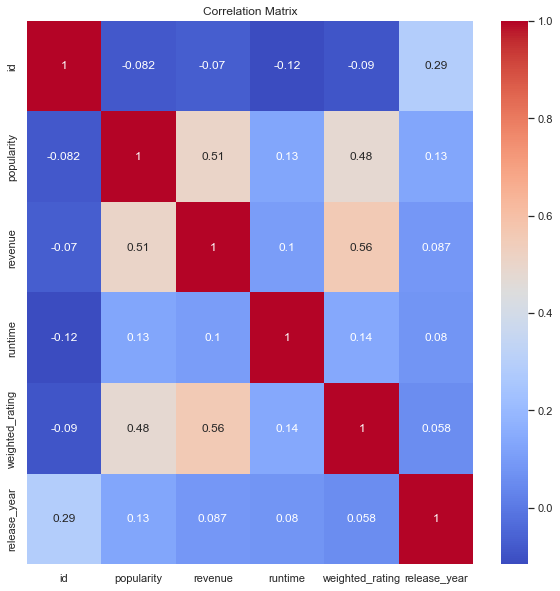

In [74]:
#Heatmap of correlations
plt.figure(figsize =(10,10))
sns.heatmap(correlarion_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

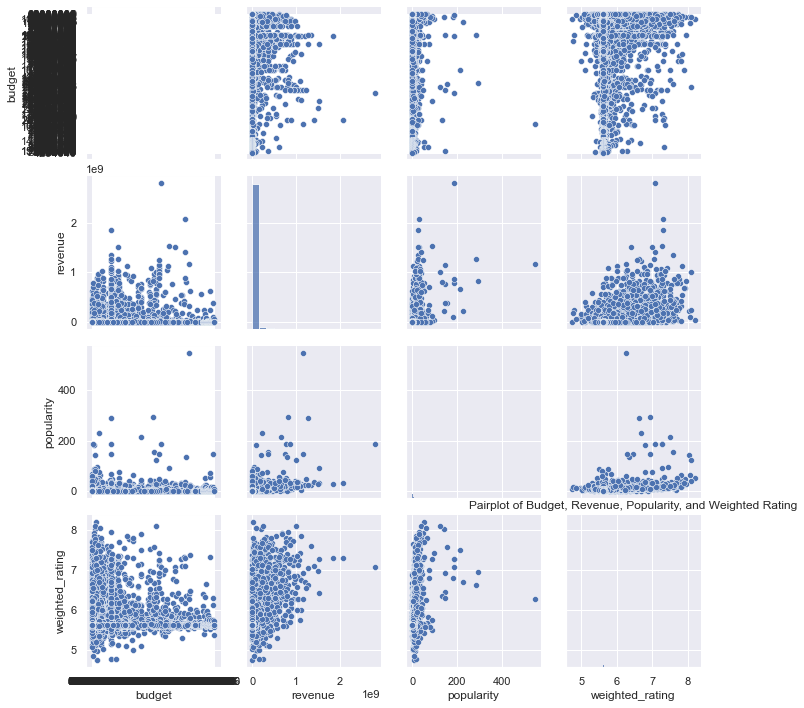

In [75]:
# Multivariate analysis with multiple variables
# Pairplot of budget, revenue, popularity, and weighted rating
sns.pairplot(data=movie, vars=['budget', 'revenue', 'popularity', 'weighted_rating'])
plt.title('Pairplot of Budget, Revenue, Popularity, and Weighted Rating')
plt.show()

- by observing the above graphs
  - revenue,weighted_rating,popularity have small corelarion.
  - when a movie is popular and highly rated then it generated more revenue.

In [79]:
### Catogorical data
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(movie['genres'], [movie['title'], movie['rating']])

# Perform the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print('Chi-square statistic:', chi2)
print('P-value:', p_value)
print('Degrees of freedom:', dof)
print('Expected frequencies:', expected)

Chi-square statistic: 175697667.30144146
P-value: 0.0
Degrees of freedom: 172403008
Expected frequencies: [[5.29866781e-02 5.29866781e-02 1.05973356e-01 ... 5.29866781e-02
  5.29866781e-02 5.29866781e-02]
 [6.08079072e-03 6.08079072e-03 1.21615814e-02 ... 6.08079072e-03
  6.08079072e-03 6.08079072e-03]
 [2.04125483e-03 2.04125483e-03 4.08250967e-03 ... 2.04125483e-03
  2.04125483e-03 2.04125483e-03]
 ...
 [6.44606790e-05 6.44606790e-05 1.28921358e-04 ... 6.44606790e-05
  6.44606790e-05 6.44606790e-05]
 [4.29737860e-05 4.29737860e-05 8.59475720e-05 ... 4.29737860e-05
  4.29737860e-05 4.29737860e-05]
 [2.14868930e-05 2.14868930e-05 4.29737860e-05 ... 2.14868930e-05
  2.14868930e-05 2.14868930e-05]]


- With such a low p-value, we can reject the null hypothesis(which is variables are highly corelated based on Chi-square statistics)which assumes that there is no association between the variables (i.e., the variables are independent). Therefore, we can conclude that there is a statistically significant relationship between the categorical variables.